In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("netflix.csv")

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### 1 ¿Qué tipo de show es el más frecuente?

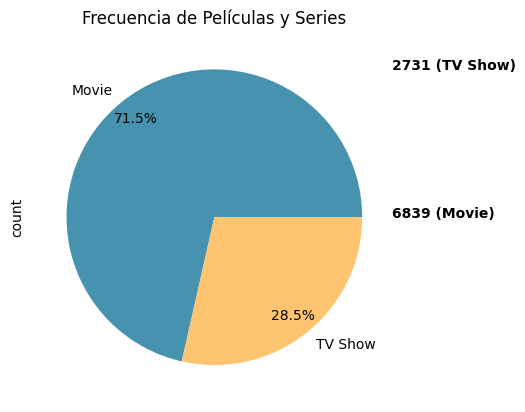

In [45]:
import matplotlib.pyplot as plt

# Calcula la frecuencia de tipos
frecuencia_tipos = df['type'].value_counts()

# Crea la figura y los ejes
fig, ax = plt.subplots()

# Grafica el gráfico de torta de frecuencia de tipos
pie = frecuencia_tipos.plot(kind='pie', ax=ax, colors=['#4793AF', '#FFC470'], autopct='%1.1f%%', pctdistance=0.85)

# Agrega la cantidad que representa cada porcentaje
for i, v in enumerate(frecuencia_tipos):
    ax.text(1.2, i, f'{v} ({frecuencia_tipos.index[i]})', color='black', fontweight='bold', ha='left')

# Configura el título
ax.set_title('Frecuencia de Películas y Series')

# Muestra la gráfica
plt.show()

### 2 ¿En qué año se produjeron más películas y series?

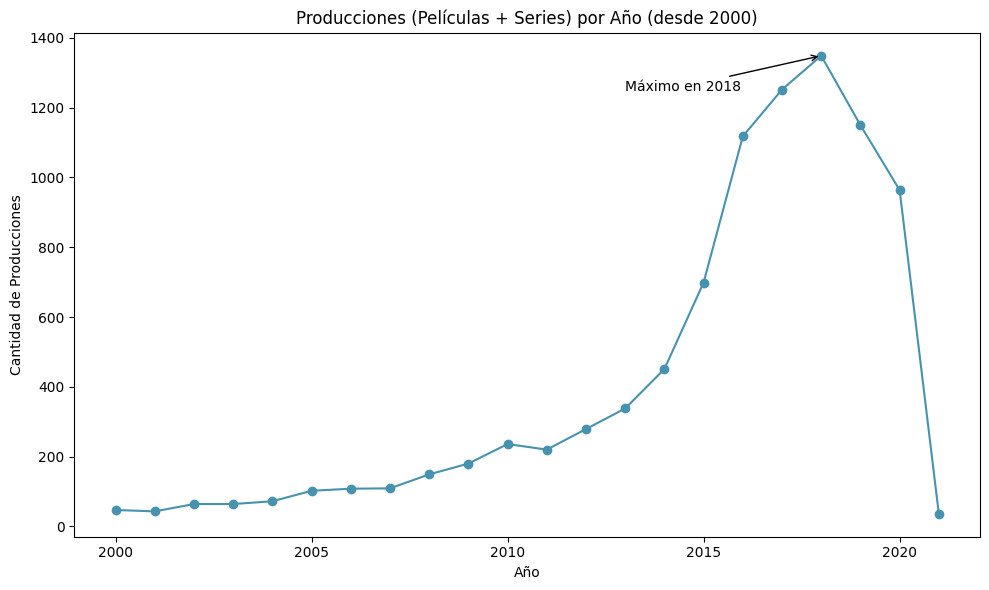

In [12]:
# Filtra el DataFrame para incluir solo los datos a partir del año 2000
df_desde_2000 = df[df['release_year'] >= 2000]

# Agrupa el DataFrame filtrado por año de lanzamiento y cuenta la cantidad de películas y series en cada año
producciones_por_año = df_desde_2000.groupby('release_year').size().reset_index(name='Total').set_index('release_year')

# Encuentra el año con el mayor número total de producciones
año_max_producciones = producciones_por_año['Total'].idxmax()

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica la cantidad total de producciones por año como un gráfico de líneas
producciones_por_año['Total'].plot(kind='line', ax=ax, color='#4793AF', marker='o')

# Destaca el año con el mayor número de producciones
ax.annotate(f'Máximo en {año_max_producciones}', xy=(año_max_producciones, producciones_por_año['Total'].max()),
            xytext=(año_max_producciones - 5, producciones_por_año['Total'].max() - 100),
            arrowprops=dict(facecolor='black', arrowstyle='->'))

# Configura el título y las etiquetas de los ejes
ax.set_title('Producciones (Películas + Series) por Año (desde 2000)')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Producciones')

# Muestra la gráfica
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

### 3. ¿Qué países aportan más películas y series de TV?

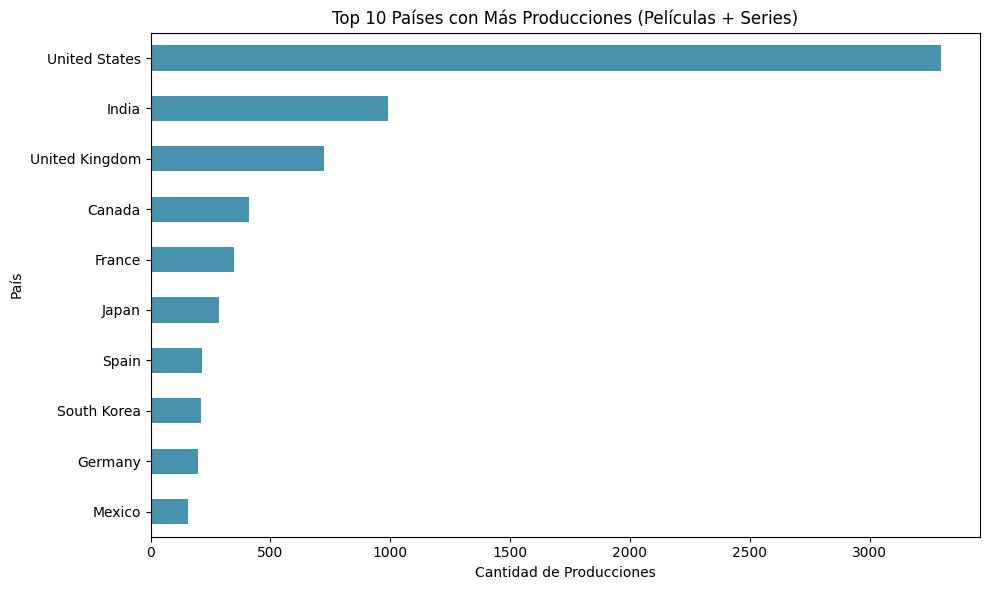

In [13]:

# Agrupa el DataFrame por país y cuenta la cantidad de películas y series en cada país
producciones_por_pais = df.groupby('country').size().reset_index(name='Total').set_index('country')

# Ordena los países por la cantidad total de producciones
producciones_por_pais = producciones_por_pais.sort_values(by='Total', ascending=True)

# Filtra los 10 países con la mayor cantidad total de producciones
top_10_paises = producciones_por_pais.tail(10)

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica la cantidad total de producciones por país como un gráfico de barras horizontales
top_10_paises['Total'].plot(kind='barh', ax=ax, color='#4793AF')

# Configura el título y las etiquetas de los ejes
ax.set_title('Top 10 Países con Más Producciones (Películas + Series)')
ax.set_xlabel('Cantidad de Producciones')
ax.set_ylabel('País')

# Muestra la gráfica
plt.tight_layout()
plt.show()

### 4 ¿Cómo se distribuye la cantidad de series y películas según rating?


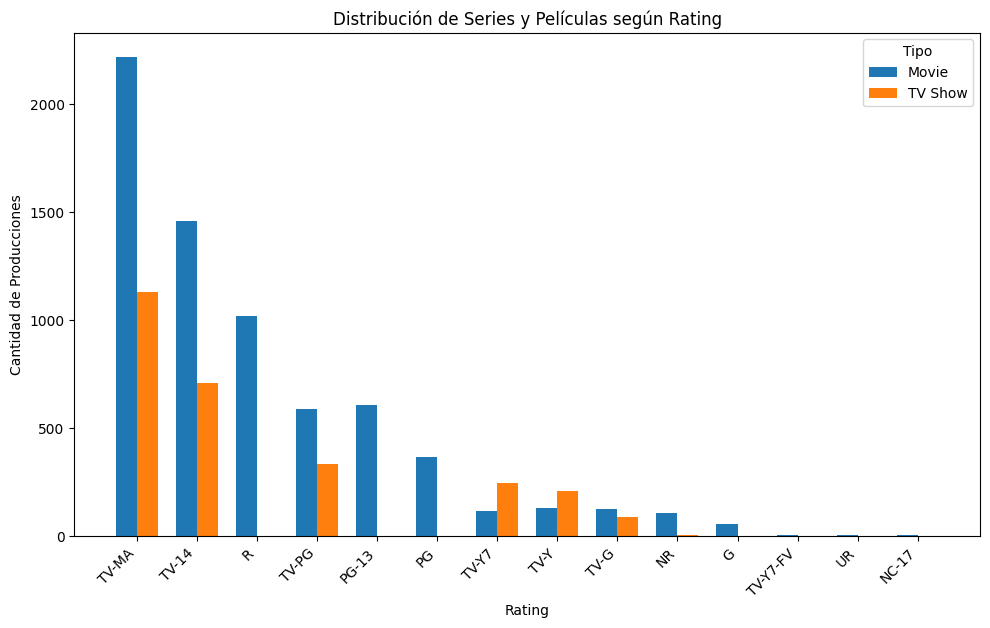

In [40]:

# Suponiendo que 'df' es tu DataFrame con la información de películas y series
# Reemplaza 'df' con el nombre real de tu DataFrame

# Agrupa el DataFrame por rating y tipo (serie o película) y cuenta la cantidad de producciones en cada categoría
distribucion_por_rating = df.groupby(['rating', 'type']).size().unstack(fill_value=0)

# Reordena las columnas del DataFrame para que las categorías de rating estén ordenadas de menor a mayor
ratings_ordenados = sorted(distribucion_por_rating.index)

# Crea el nuevo DataFrame con las columnas ordenadas
distribucion_por_rating_ordenado = distribucion_por_rating.reindex(ratings_ordenados)

# Calcula el total de cada categoría de rating y ordénalos de mayor a menor
total_por_rating = distribucion_por_rating_ordenado.sum(axis=1)
total_por_rating_ordenado = total_por_rating.sort_values(ascending=False)

# Reordena las columnas del DataFrame según el orden de los totales
distribucion_por_rating_ordenado = distribucion_por_rating_ordenado.loc[total_por_rating_ordenado.index]

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Obtén el número de tipos (series y películas)
num_tipos = len(distribucion_por_rating_ordenado.columns)

# Definir el ancho de las barras
ancho_barra = 0.35

# Calcula el desplazamiento para cada tipo
desplazamiento = -ancho_barra / 2 * (num_tipos - 1)

# Itera sobre las columnas y agrega barras individuales para cada tipo
for i, (tipo, datos) in enumerate(distribucion_por_rating_ordenado.items()):
    x = range(len(datos))
    ax.bar([pos + desplazamiento + i * ancho_barra for pos in x], datos, width=ancho_barra, label=tipo)

# Configura el título y las etiquetas de los ejes
ax.set_title('Distribución de Series y Películas según Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Cantidad de Producciones')

# Configurar el eje x
ax.set_xticks(range(len(distribucion_por_rating_ordenado.index)))
ax.set_xticklabels(distribucion_por_rating_ordenado.index)

# Muestra la leyenda
plt.legend(title='Tipo')

# Muestra la gráfica
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()


### 5 ¿Cómo se distribuye la audiencia objetivo (usar rating para esto) según el origen de los shows?

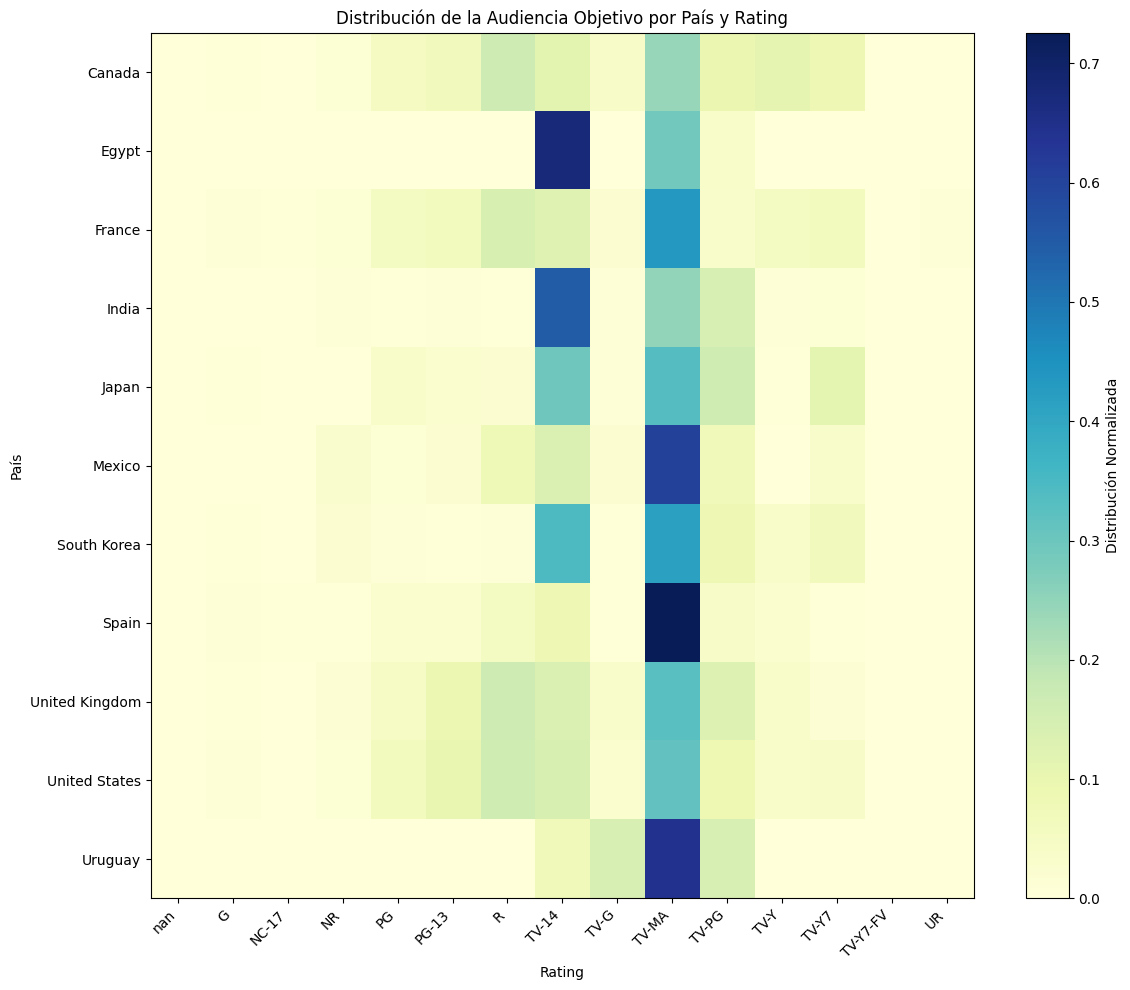

In [23]:
# Separar los países que están concatenados por una coma y un espacio
df['country'] = df['country'].str.split(', ')

# Expandir filas para cada país en la lista
df = df.explode('country')

# Obtener la lista completa de países
# all_countries = df['country'].unique()
all_countries = ["United States","India","United Kingdom","Japan","South Korea","Canada","Spain","France","Egypt","Mexico","Uruguay"]

# Crear un DataFrame con todas las combinaciones de país y rating
all_combinations = pd.MultiIndex.from_product([all_countries, df['rating'].unique()], names=['country', 'rating'])
df_full = pd.DataFrame(index=all_combinations).reset_index()

# Unir con los datos originales para contar la cantidad de shows
df_full = df_full.merge(df.groupby(['country', 'rating']).size().reset_index(name='count'), how='left', on=['country', 'rating'])

# Rellenar valores nulos con cero
df_full['count'] = df_full['count'].fillna(0)

# Reorganizar los datos para tener un formato de tabla con país como índice
audiencia_por_pais_y_rating = df_full.pivot(index='country', columns='rating', values='count').fillna(0)

# Normalizar los datos
audiencia_por_pais_y_rating_norm = audiencia_por_pais_y_rating.div(audiencia_por_pais_y_rating.sum(axis=1), axis=0)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12,10))

# Graficar la distribución de la audiencia objetivo según el origen de los shows como un heatmap
heatmap = ax.imshow(audiencia_por_pais_y_rating_norm, cmap='YlGnBu', aspect='auto')  # Ajuste del aspecto

# Configurar el título y las etiquetas de los ejes
ax.set_title('Distribución de la Audiencia Objetivo por País y Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('País')

# Mostrar la barra de color
cbar = plt.colorbar(heatmap)
cbar.set_label('Distribución Normalizada')

# Mostrar los ticks y las etiquetas
ax.set_xticks(range(len(audiencia_por_pais_y_rating_norm.columns)))
ax.set_xticklabels(audiencia_por_pais_y_rating_norm.columns)
ax.set_yticks(range(len(audiencia_por_pais_y_rating_norm.index)))
ax.set_yticklabels(audiencia_por_pais_y_rating_norm.index)

# Rotar las etiquetas del eje y para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()


# hacer uno con EEUU, otro con india, otro con 5 paises con mas peliculas

In [28]:
# Convertir la columna 'date_added' a formato de fecha
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

# Extraer el mes de cada entrada
df['month_added'] = df['date_added'].dt.month

# Contar la cantidad de películas y series agregadas por mes
movies_series_by_month = df.groupby(['month_added', 'type']).size().unstack(fill_value=0)

print("Cantidad de películas y series agregadas por mes:")
print(movies_series_by_month)

# Ahora, para analizar cómo varía la categoría (listed_in) según el mes del año,
# podríamos hacer un análisis similar utilizando la función groupby()

category_by_month = df.groupby(['month_added', 'listed_in']).size().unstack(fill_value=0)

print("\nVariación de la categoría (listed_in) según el mes del año:")
print(category_by_month)

Cantidad de películas y series agregadas por mes:
type         Movie  TV Show
month_added                
1.0            758      259
2.0            435      159
3.0            557      213
4.0            532      203
5.0            446      201
6.0            476      187
7.0            530      211
8.0            519      226
9.0            534      228
10.0           725      255
11.0           637      263
12.0           690      316

Variación de la categoría (listed_in) según el mes del año:
listed_in    Action & Adventure  \
month_added                       
1.0                          16   
2.0                          11   
3.0                          11   
4.0                           8   
5.0                           3   
6.0                           4   
7.0                          10   
8.0                          18   
9.0                          17   
10.0                          9   
11.0                         13   
12.0                         25   

listed

### 6  ¿Cómo se distribuye la cantidad de series y películas según cada mes? Varía la categoría (listed in) según el mes del año?

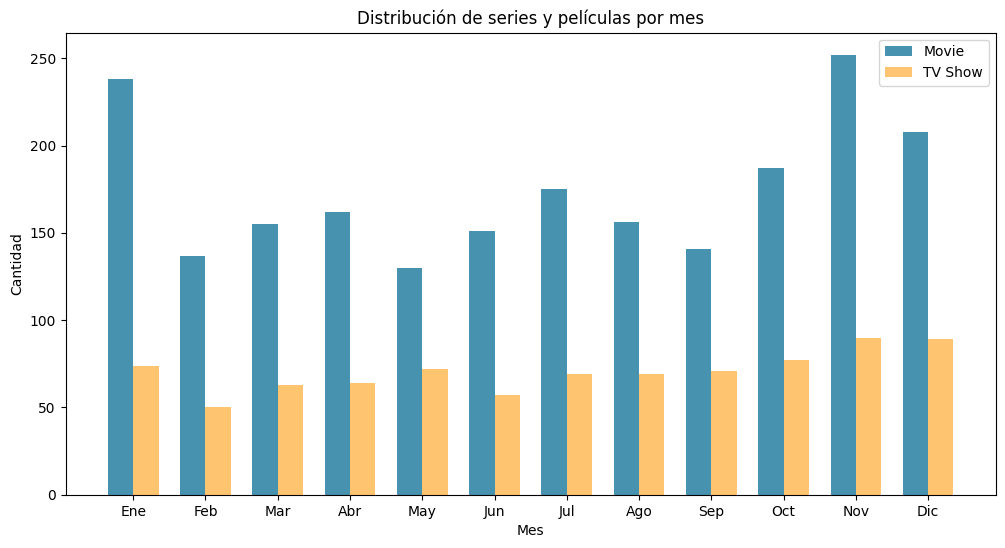

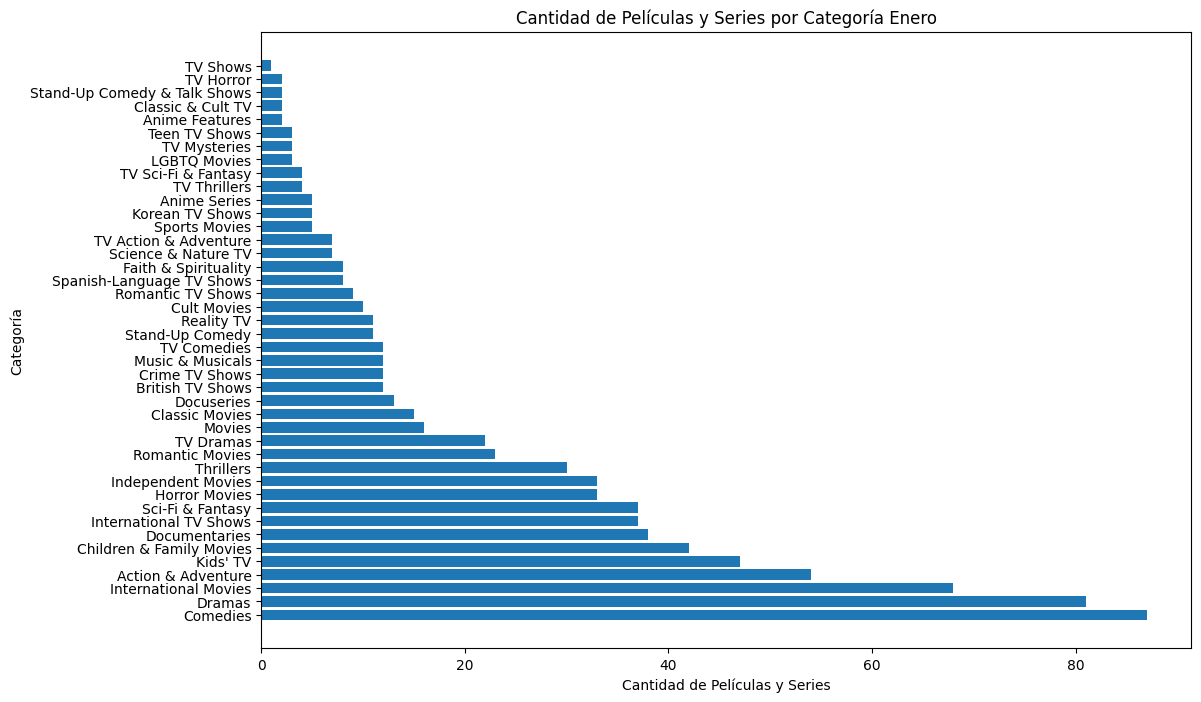

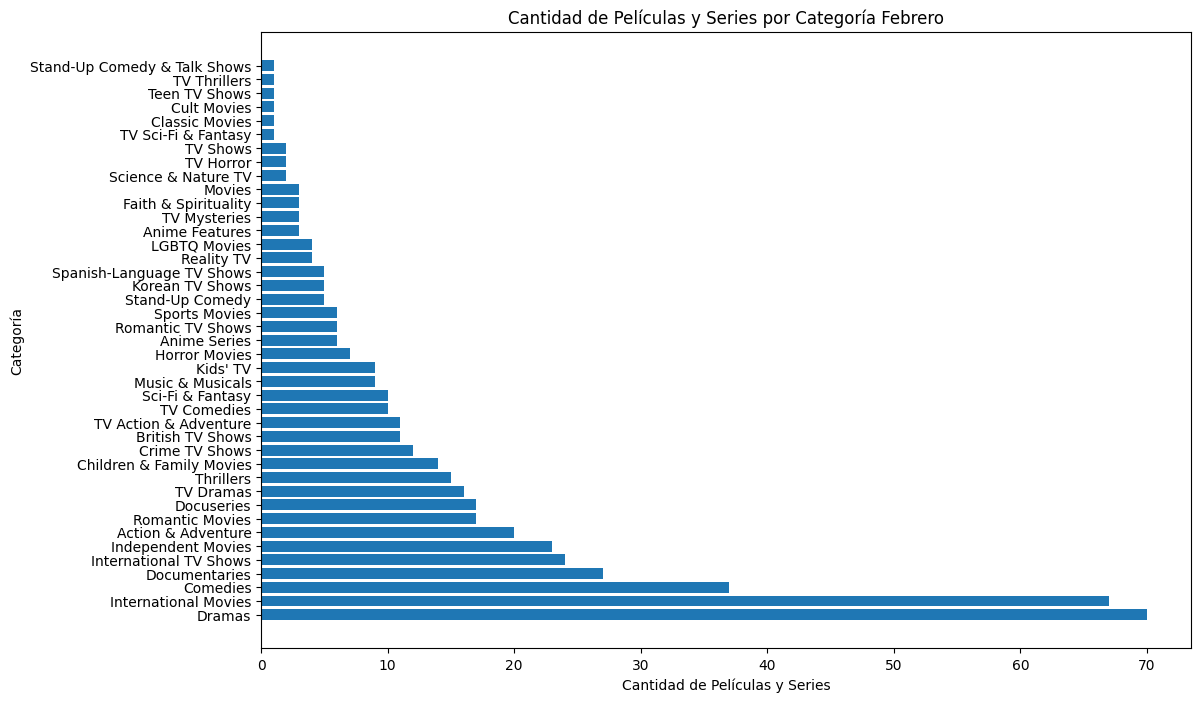

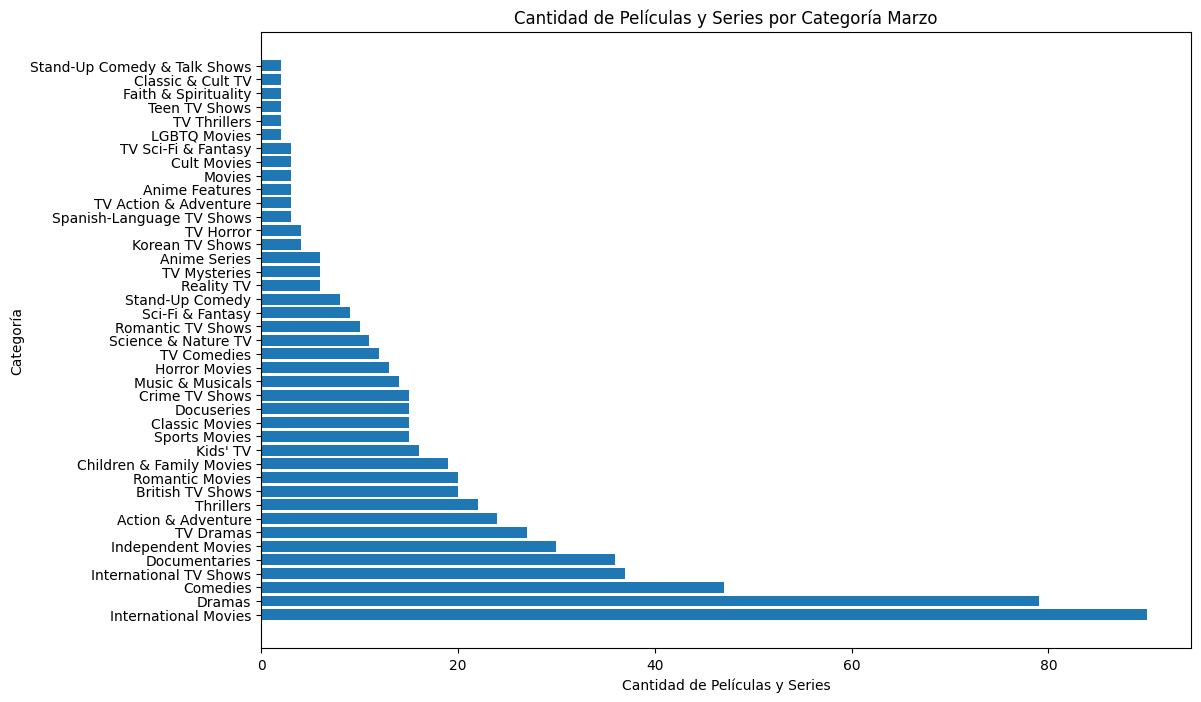

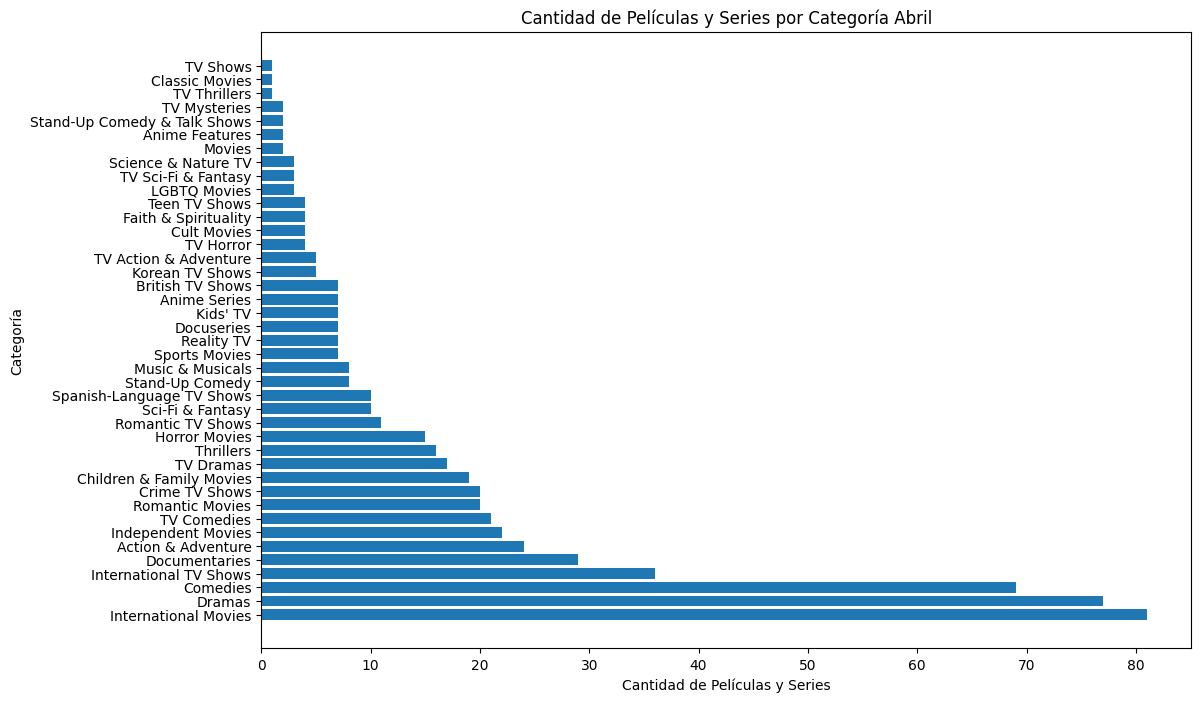

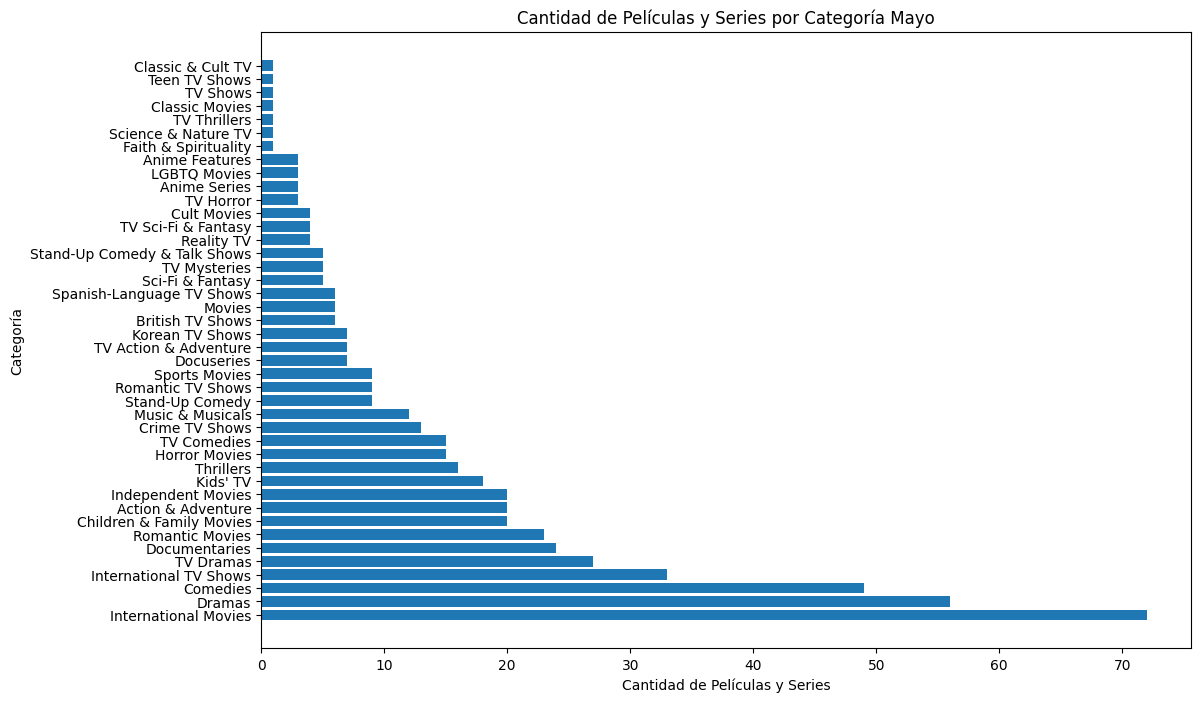

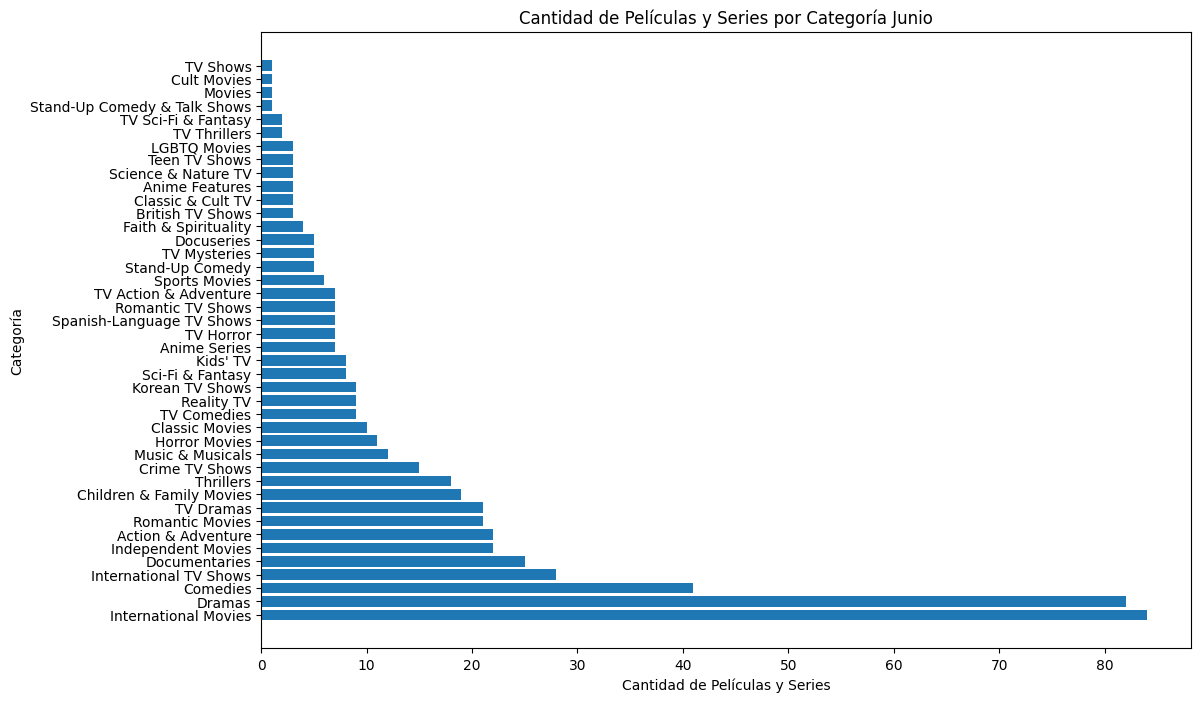

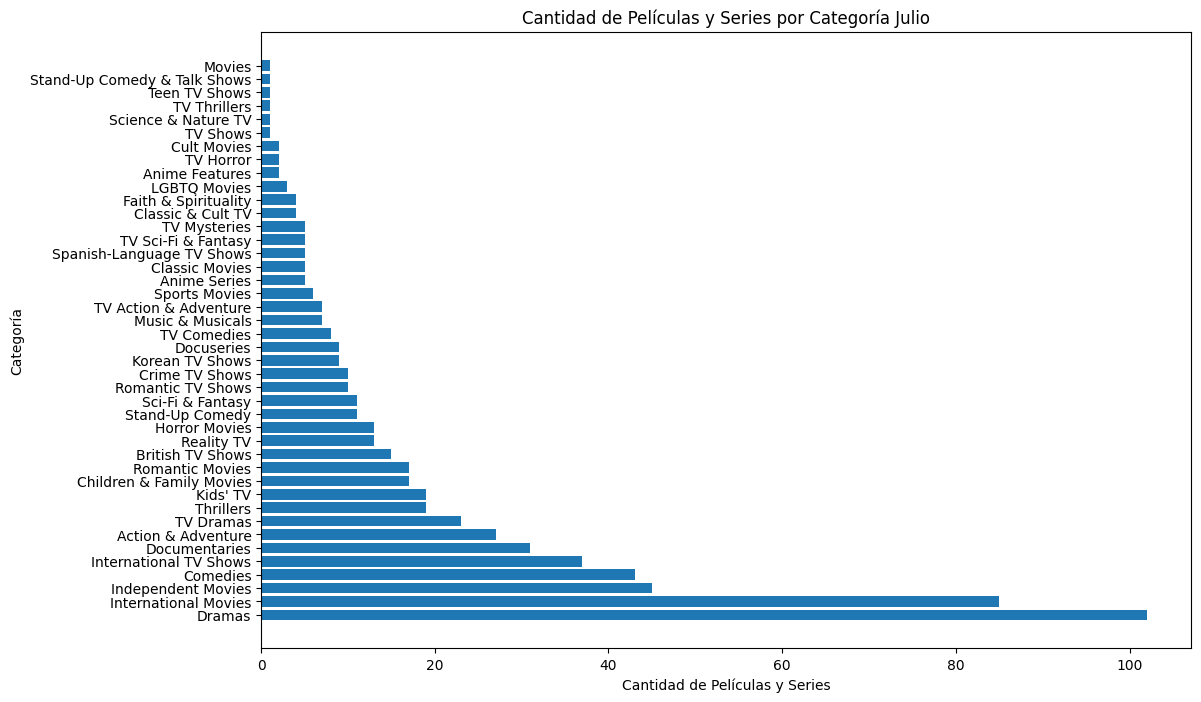

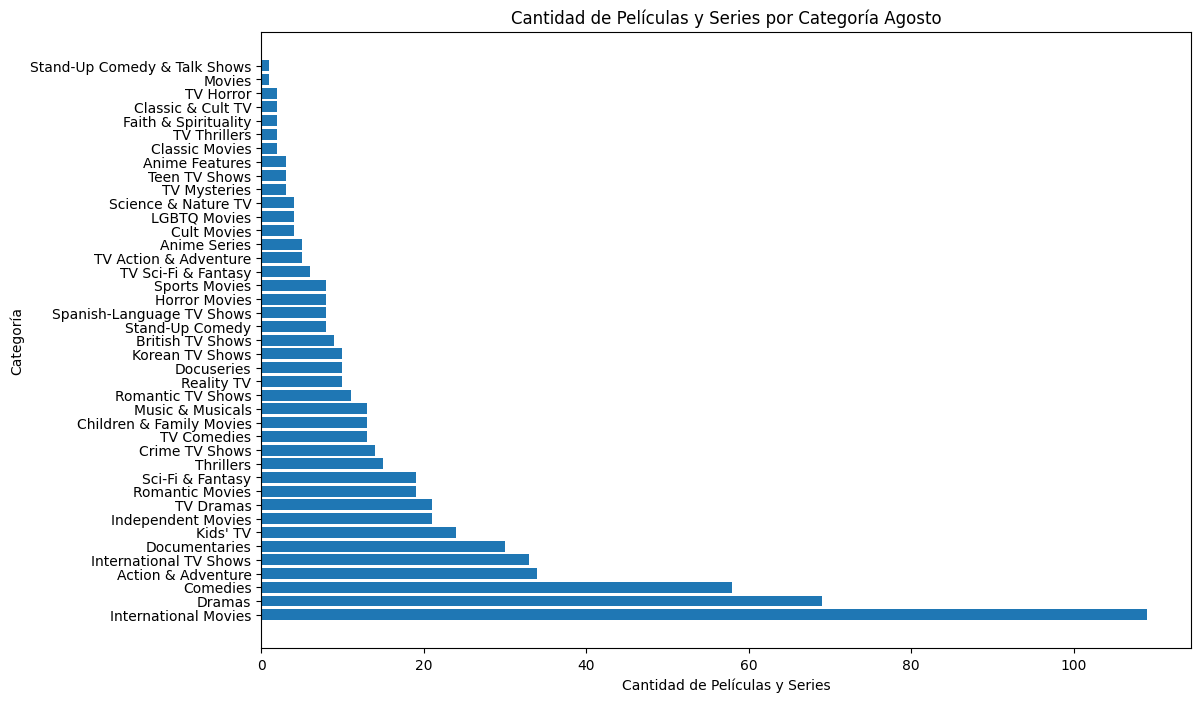

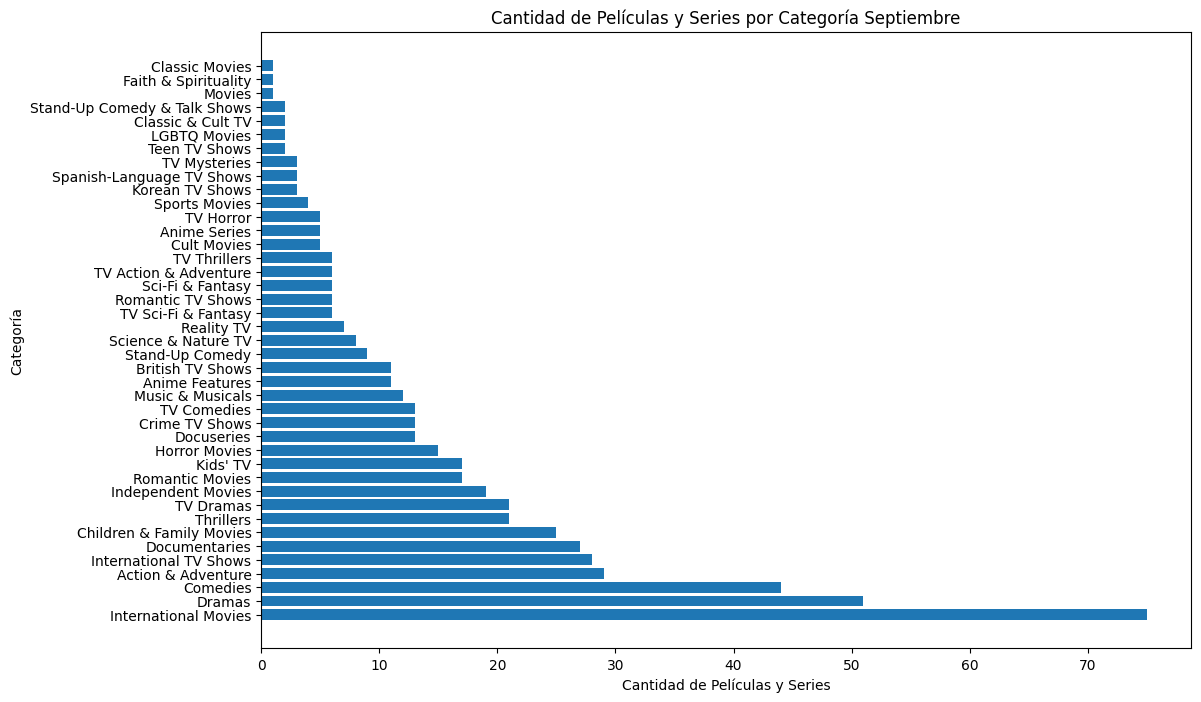

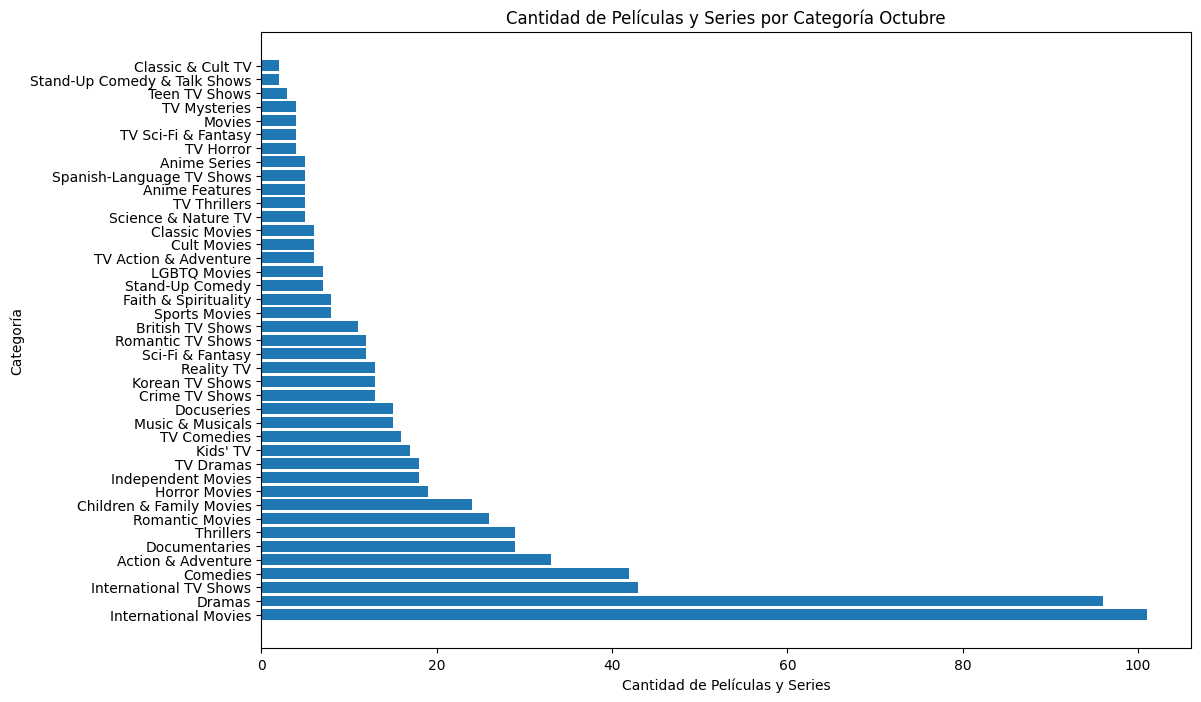

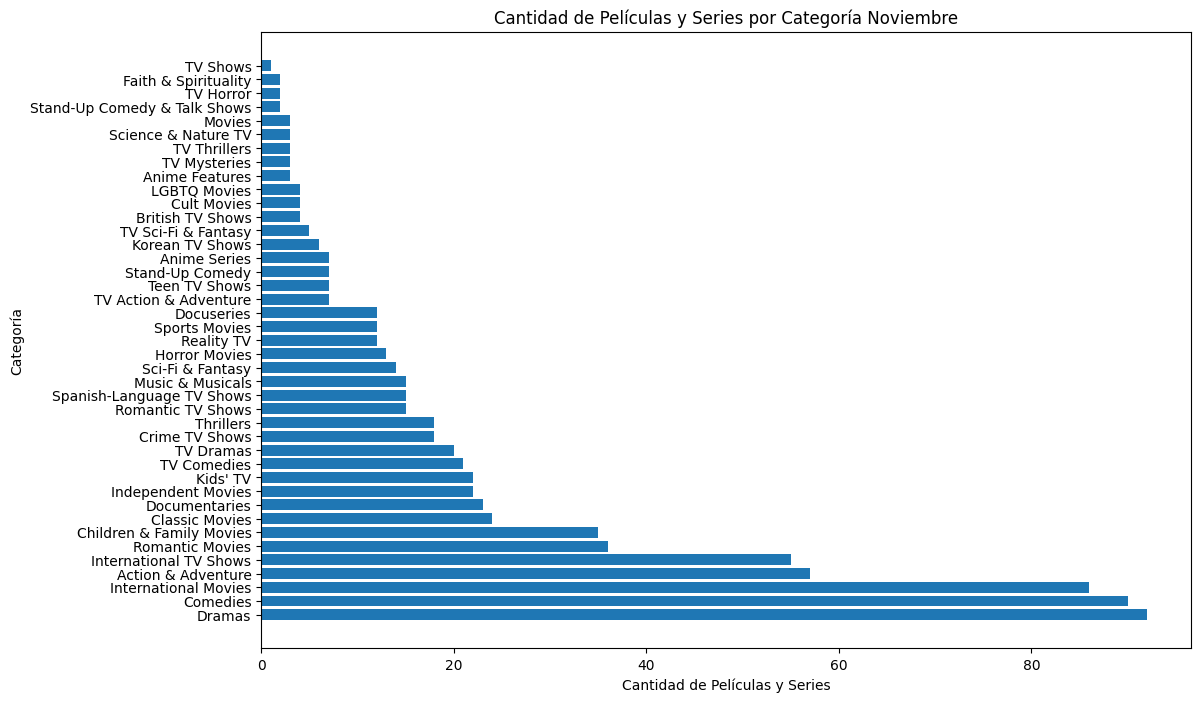

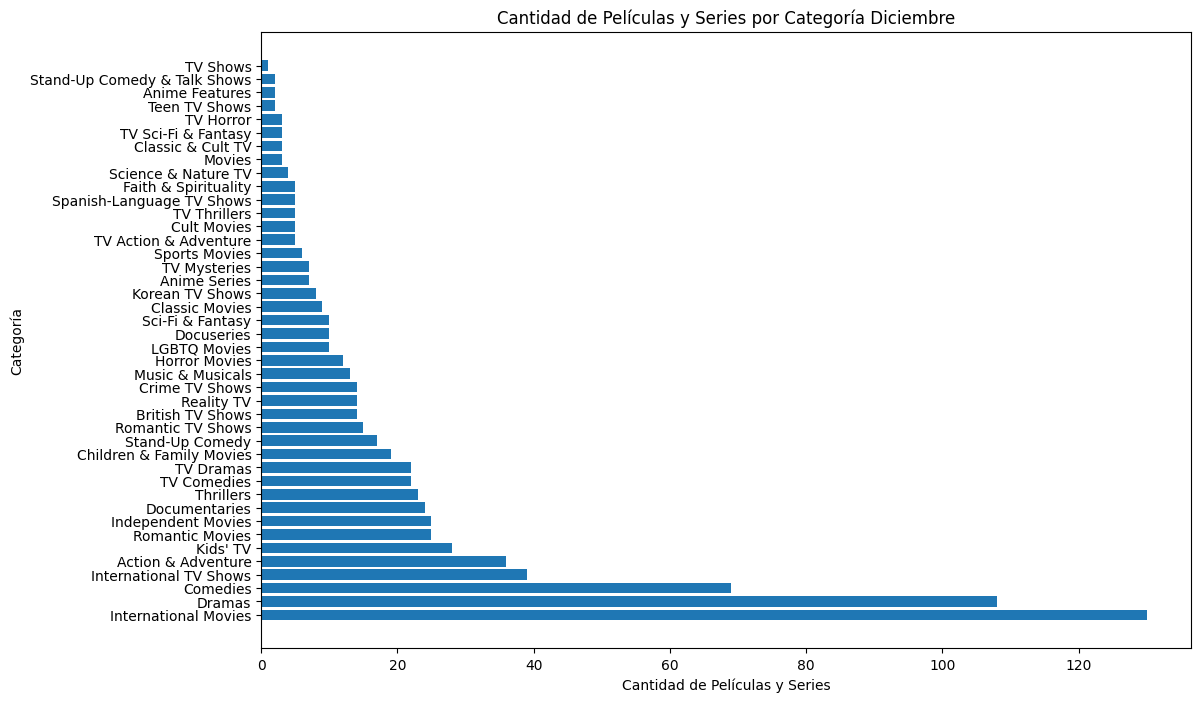

In [47]:
import calendar

# Convertir la columna 'date_added' al formato de fecha
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

# Extraer el mes y el año de la columna 'date_added'
df['mes'] = df['date_added'].dt.month
df['año'] = df['date_added'].dt.year

# Filtrar por tipo de contenido ('type') y contar la cantidad por mes
conteo_por_mes = df.groupby(['mes', 'año', 'type']).size().reset_index(name='cantidad')

# Verificar y dividir los valores de 'listed_in' solo si son de tipo cadena
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Crear un nuevo DataFrame con filas duplicadas para cada categoría de 'listed_in'
categorias_df = df.explode('listed_in')

# Filtrar por categoría ('listed_in') y contar la cantidad por mes
conteo_por_categoria = categorias_df.groupby(['mes', 'año', 'listed_in']).size().reset_index(name='cantidad')

# Graficar la distribución de series y películas por mes
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35

meses = np.arange(1, 13)
tipos = conteo_por_mes['type'].unique()
colors = ['#4793AF', '#FFC470']

for i, tipo in enumerate(tipos):
    data = conteo_por_mes[conteo_por_mes['type'] == tipo]
    ax.bar(data['mes'] + i*width, data['cantidad'], width, label=tipo, color=colors[i])

ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad')
ax.set_title('Distribución de series y películas por mes')
ax.set_xticks(meses + width / 2)
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax.legend()

plt.show()

# Graficar la distribución de categorías por mes
categorias = conteo_por_categoria['listed_in'].unique()
n_categorias = len(categorias)
bar_width = 0.8
meses = np.arange(1, 13)

meses_str = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

for mes in meses:    
    df_datos_mes = conteo_por_categoria[conteo_por_categoria['mes']==mes].sort_values('cantidad', ascending=False)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.barh(df_datos_mes['listed_in'], df_datos_mes['cantidad'], bar_width)
    ax.set_ylabel('Categoría')
    ax.set_xlabel('Cantidad de Películas y Series')
    ax.set_title(f"""Cantidad de Películas y Series por Categoría {meses_str[mes]}""" )
    plt.show()

### 7 ¿Cuáles son los directores más populares?

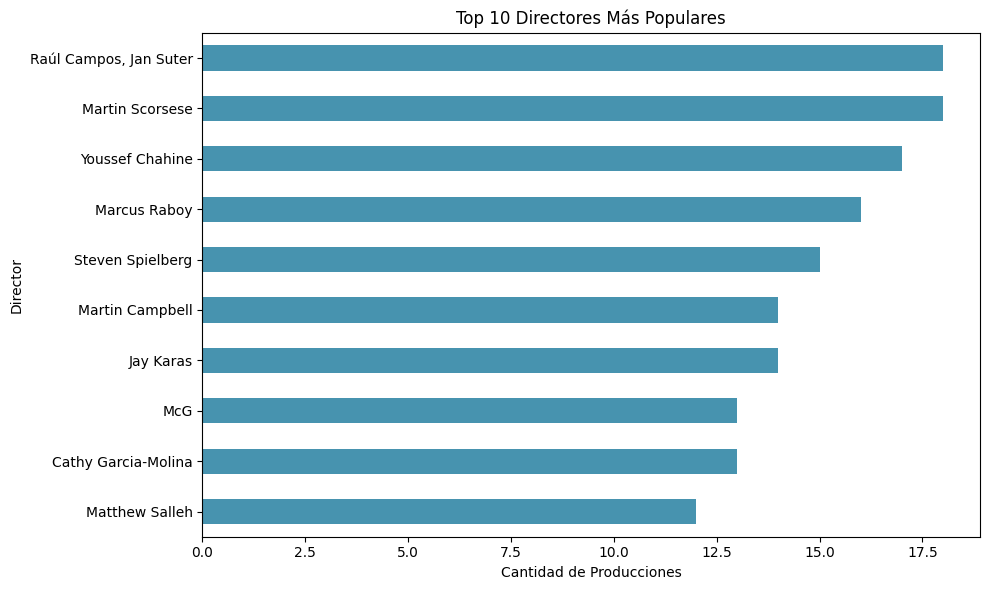

In [30]:
# Suponiendo que 'df' es tu DataFrame con la información de películas y series
# Reemplaza 'df' con el nombre real de tu DataFrame

# Cuenta la cantidad de producciones para cada director
directores_populares = df['director'].value_counts().head(10)

# Reordena los directores de mayor a menor
directores_populares = directores_populares.sort_values(ascending=True)

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica los 10 directores más populares como un gráfico de barras horizontales
directores_populares.plot(kind='barh', ax=ax, color='#4793AF')

# Configura el título y las etiquetas de los ejes
ax.set_title('Top 10 Directores Más Populares')
ax.set_xlabel('Cantidad de Producciones')
ax.set_ylabel('Director')

# Muestra la gráfica
plt.tight_layout()
plt.show()


### 8 ¿Cuáles son los actores más populares?

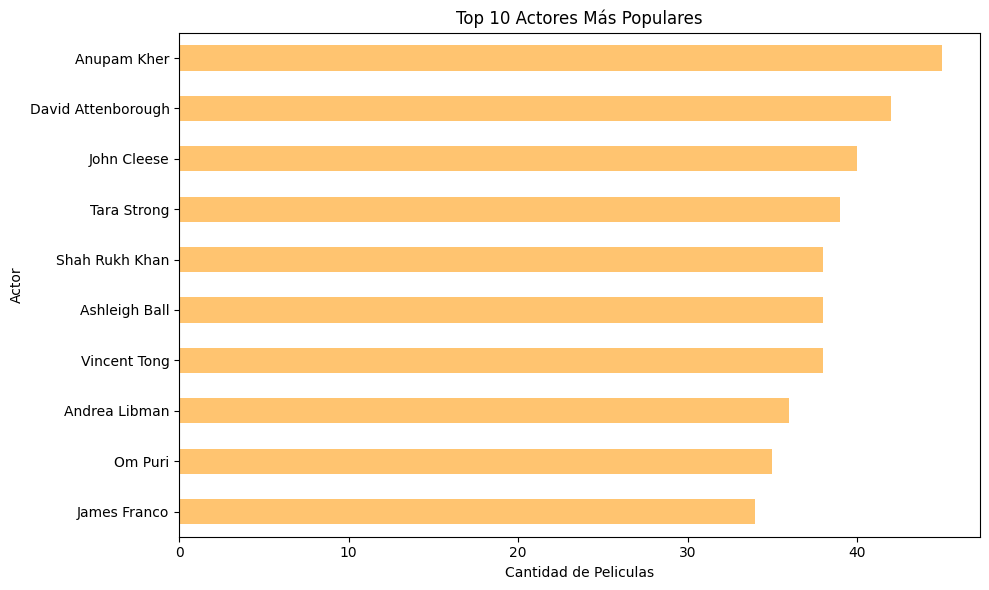

In [31]:

# Suponiendo que 'df' es tu DataFrame con la información de películas y series
# Reemplaza 'df' con el nombre real de tu DataFrame

# Eliminar las comillas de la columna 'cast' y dividir los nombres de los actores
actores = df['cast'].str.replace('"', '').str.split(', ')

# Concatenar todas las listas de actores en una sola serie
actores_concatenados = pd.Series([actor for sublist in actores.dropna() for actor in sublist])

# Cuenta la cantidad de producciones para cada actor
actores_populares = actores_concatenados.value_counts().head(10)

# Reordena los actores de mayor a menor
actores_populares = actores_populares.sort_values(ascending=True)

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica los 10 actores más populares como un gráfico de barras horizontales
actores_populares.plot(kind='barh', ax=ax, color='#FFC470')

# Configura el título y las etiquetas de los ejes
ax.set_title('Top 10 Actores Más Populares')
ax.set_xlabel('Cantidad de Peliculas')
ax.set_ylabel('Actor')

# Muestra la gráfica
plt.tight_layout()
plt.show()


### 9 ¿Cómo se distribuye la duración en series y películas?

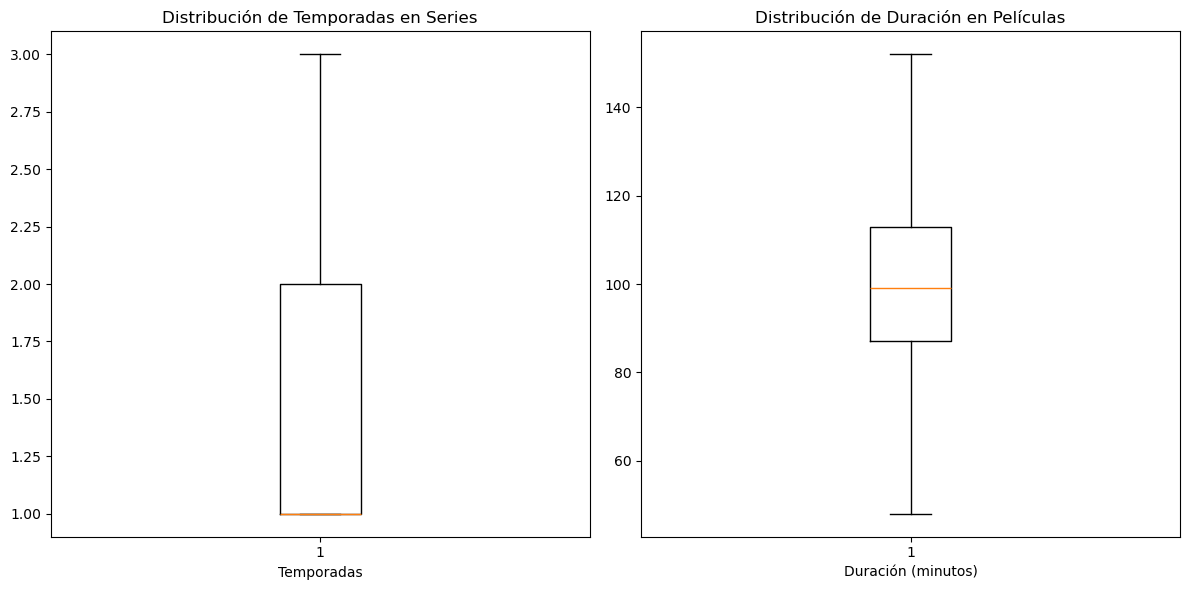

In [13]:
def extract_duration(duration_str):
    if 'Season' in duration_str:
        return int(duration_str.split()[0])
    return 0

def extract_seasons(duration_str:str):
    duration_str.lower
    return int(duration_str.split()[0])
    # if 'Season' or 'Seasons' in duration_str:
    #     return int(duration_str.split()[0])
    # return None

df['duration_min'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'Season' not in x else None)
df['seasons'] = df['duration'].apply(extract_seasons)

# Dividir el DataFrame en dos según el tipo (TV Show o Movie)
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

# Generar boxplots
plt.figure(figsize=(12, 6))

# Boxplot para la distribución de temporadas en series
plt.subplot(1, 2, 1)
plt.boxplot(tv_shows['seasons'].dropna(), vert=True, showfliers=False)
plt.title('Distribución de Temporadas en Series')
plt.xlabel('Temporadas')

# Boxplot para la distribución de duración en películas
plt.subplot(1, 2, 2)
plt.boxplot(movies['duration_min'].dropna(), vert=True, showfliers=False)
plt.title('Distribución de Duración en Películas')
plt.xlabel('Duración (minutos)')

plt.tight_layout()
plt.show()

### 10 ¿Hay palabras que se utilicen más que otras en titulos y descripciones?

In [34]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from collections import Counter
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/coru/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/coru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

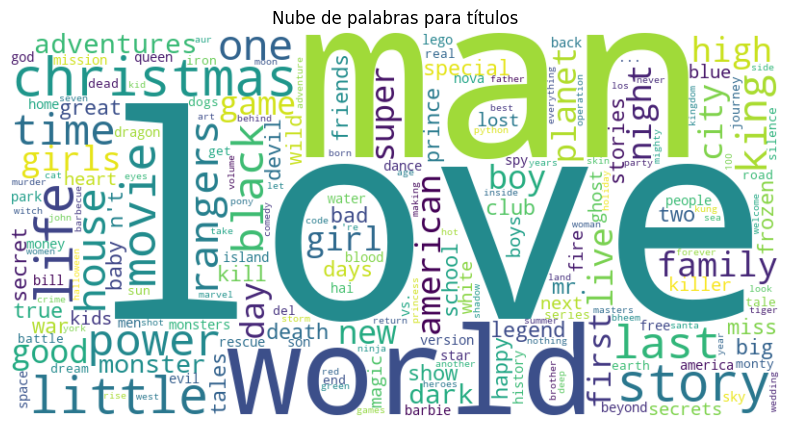

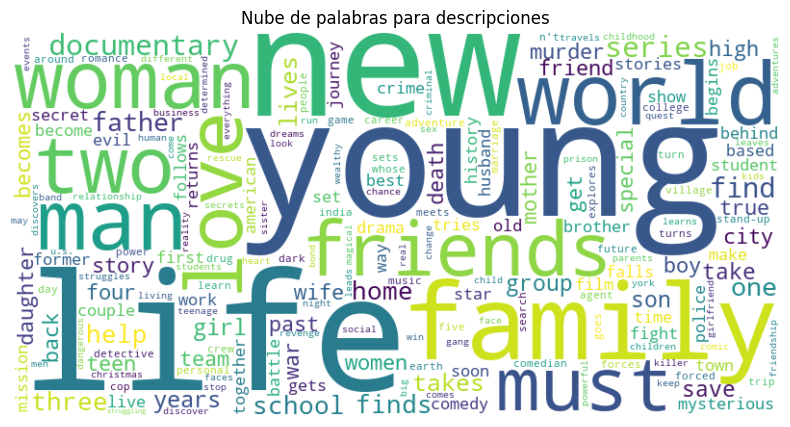

In [38]:
def tokenize_and_clean(text):
    tokens = word_tokenize(text.lower())  # Tokenizar y convertir a minúsculas
    # Eliminar stopwords y palabras con menos de 3 caracteres
    cleaned_tokens = [token for token in tokens if token not in stopwords.words('english') and len(token) > 2]
    return cleaned_tokens

# Concatenar todos los títulos y descripciones en una sola cadena
all_titles = ' '.join(df['title'])
all_descriptions = ' '.join(df['description'])

# Tokenizar y limpiar los textos
cleaned_titles = tokenize_and_clean(all_titles)
cleaned_descriptions = tokenize_and_clean(all_descriptions)

# Contar la frecuencia de las palabras en los títulos y descripciones
title_word_freq = Counter(cleaned_titles)
description_word_freq = Counter(cleaned_descriptions)

# Nube de palabras para los títulos
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para títulos')
plt.show()

# Nube de palabras para las descripciones
description_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(description_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para descripciones')
plt.show()

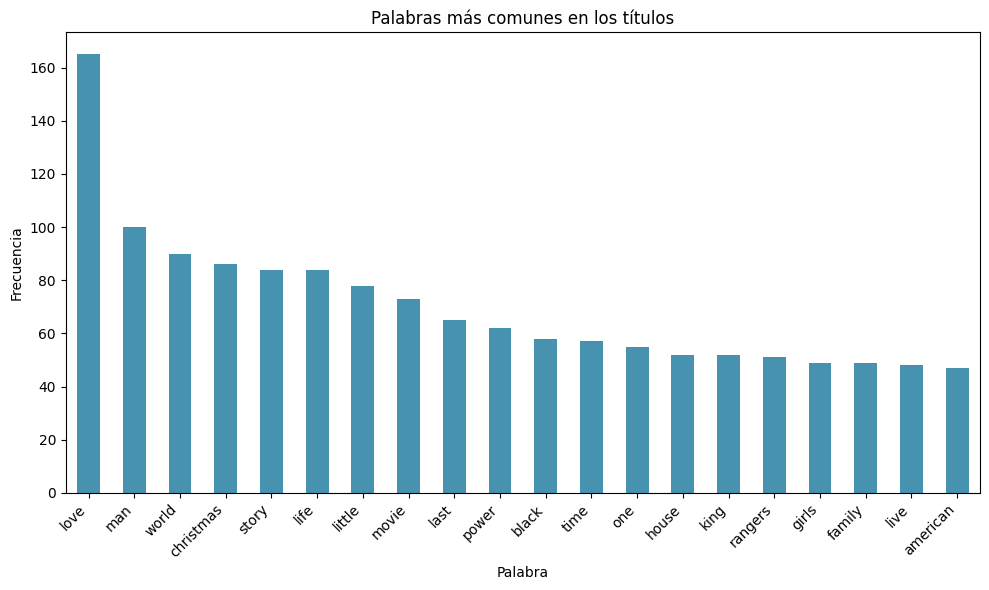

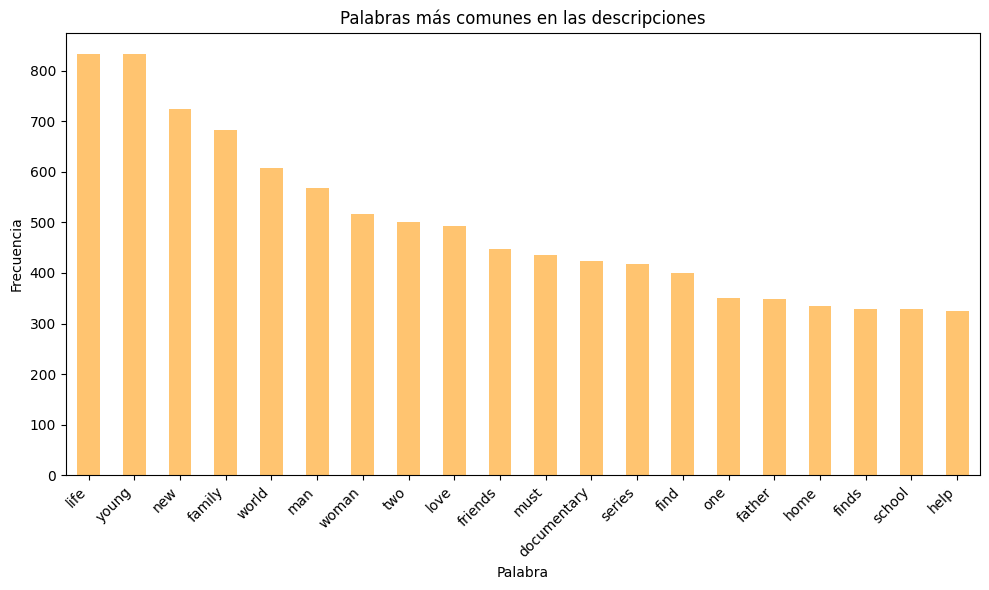

In [43]:
# Convertir las frecuencias a DataFrame para facilitar la visualización
title_word_df = pd.DataFrame.from_dict(title_word_freq, orient='index', columns=['Frequency'])
description_word_df = pd.DataFrame.from_dict(description_word_freq, orient='index', columns=['Frequency'])

# Ordenar los DataFrames por frecuencia descendente
title_word_df = title_word_df.sort_values(by='Frequency', ascending=False)
description_word_df = description_word_df.sort_values(by='Frequency', ascending=False)


# Gráfico de barras para los títulos
plt.figure(figsize=(10, 6))
title_word_df['Frequency'].head(20).plot(kind='bar', color='#4793AF')
plt.title('Palabras más comunes en los títulos')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de barras para las descripciones
plt.figure(figsize=(10, 6))
description_word_df['Frequency'].head(20).plot(kind='bar', color='#FFC470')
plt.title('Palabras más comunes en las descripciones')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()